In [7]:
# resources
import sys
sys.path.append("../src")
from auv_gym_env import make_environment
import matplotlib.pyplot as plt
import numpy as np

# Milestone 1: no obstacles

In [3]:
# milestone 1
env = make_environment('empty', 50, -1, 10, 5)
env.render()
rewards = list()

In [4]:
for t in range(1000):
    # full angle and power actuation
    obs, rew, done, info = env.step((1,1))
    rewards.append(rew)
    env.render()

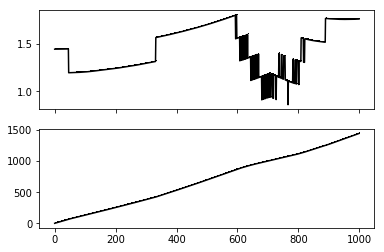

In [22]:
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(rewards, "k,-")
ax[1].plot(np.cumsum(rewards), "k,-")
plt.show()